In [1]:
#imported necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading data into a variable
df = pd.read_csv("salarydata.csv")
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [5]:
#To those columns which may have null values
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [6]:
#Here we are removing the three columns, capital gain, capital loss,
#and education-num

df.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  salary          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


In [8]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [9]:
#Changed the order of columns, 
#hours-per-week was changed to 2nd column
df = df[['age', 'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country','salary']]
df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
#Checking whether categorical columns have unwanted inputs
for i in df.iloc[:,2:].columns:
    print("{} : {}".format(i,list(pd.unique(df[i]))))
    
#Columns like workclass, occupation, native-country have a unique value '?'

workclass : ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
education : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
marital-status : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex : ['Male', 'Female']
native-country : ['United-States', 'Cuba', 'Jamaica', 'India', 

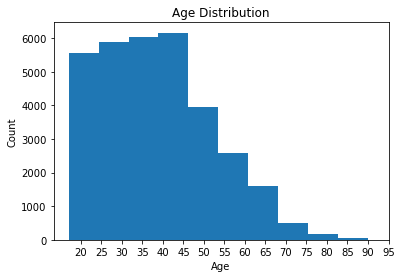

In [11]:
#We can check the above using some representations like
# graphs, barplots, etc

#checking age

plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

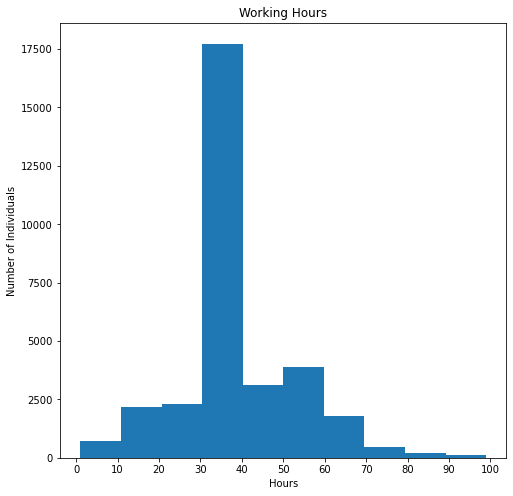

In [12]:
#checking hours-per-week

plt.hist(df['hours-per-week'])
plt.xlabel('Hours')
plt.ylabel('Number of Individuals')
plt.xticks(np.arange(0,110,10))
plt.title('Working Hours')
plt.show()

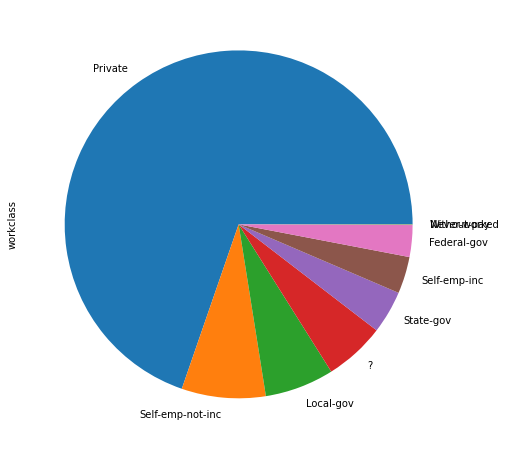

In [13]:
#checking workclass

df['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

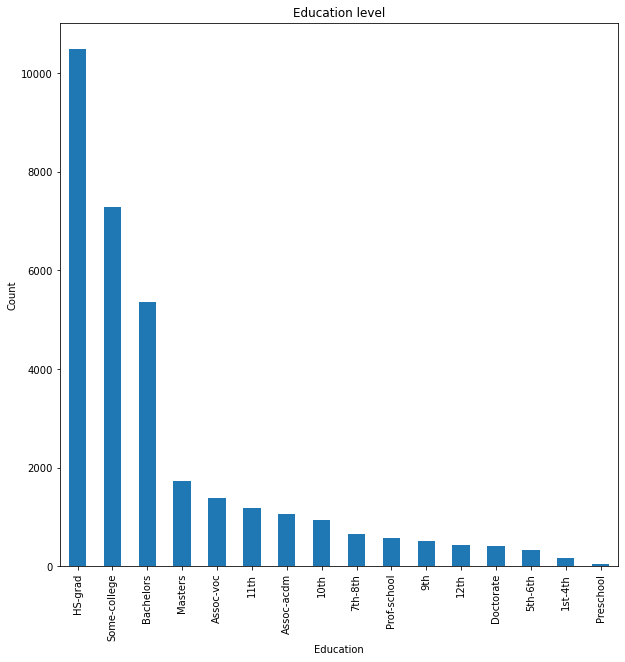

In [14]:
#checking education

df['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

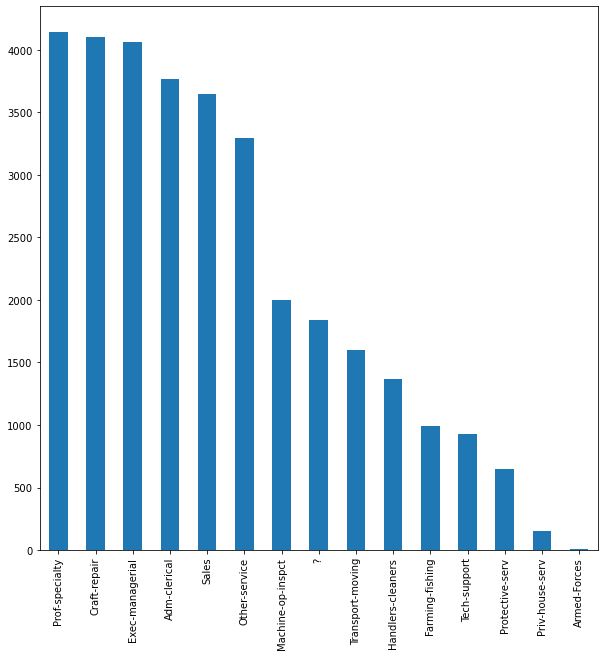

In [14]:
#checking occupation

df['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

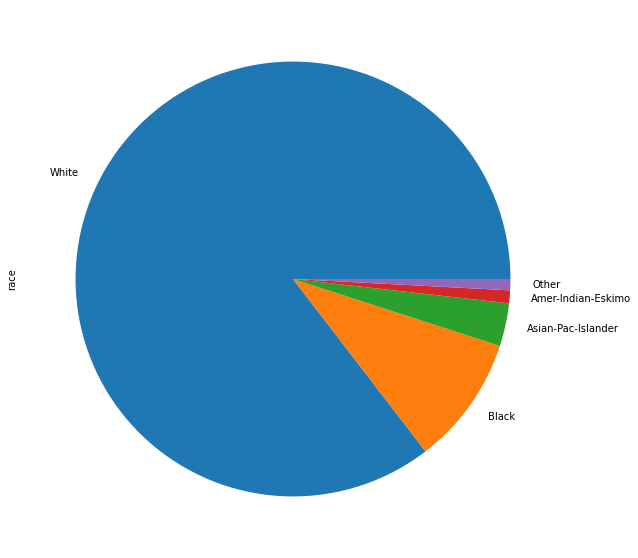

In [15]:
#Checking race

df['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

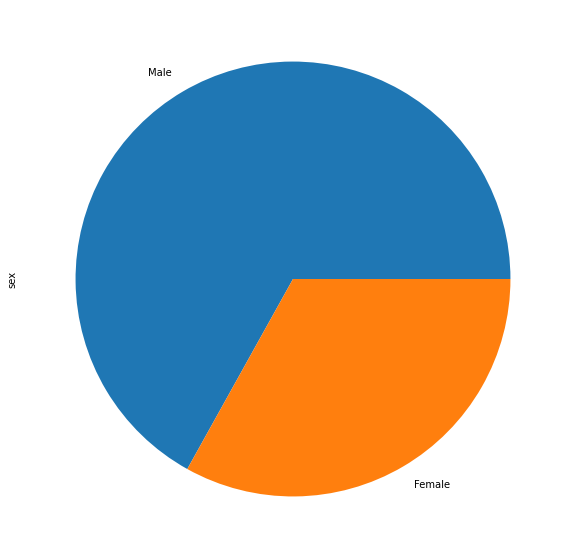

In [16]:
#Checking sex

df['sex'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

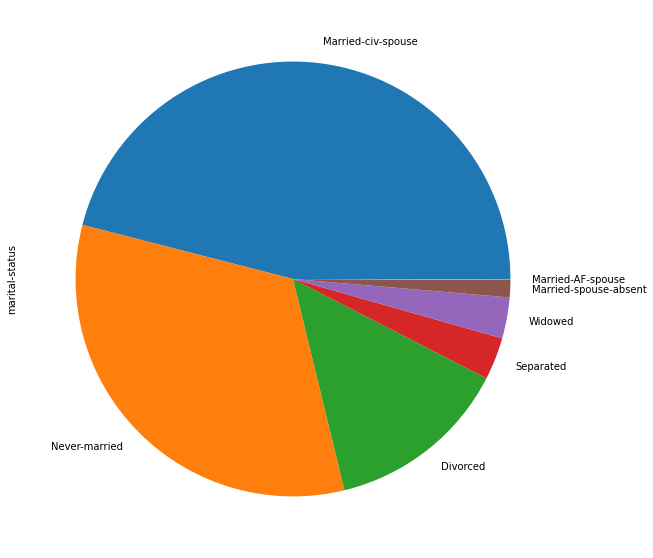

In [17]:
#checking marital-status

df['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

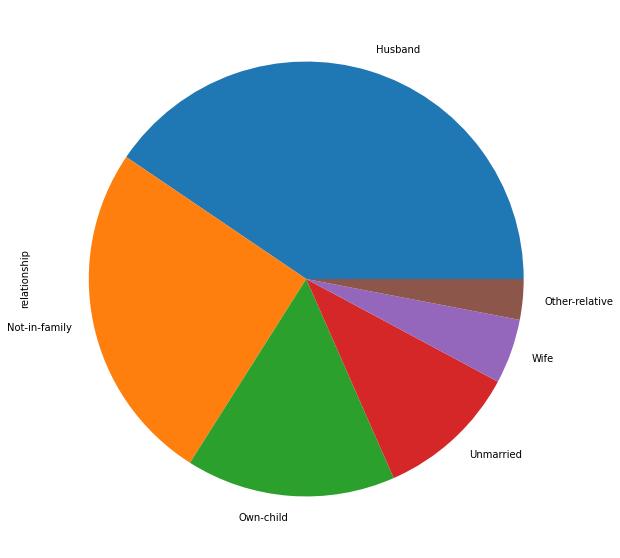

In [18]:
#checking relationship

df['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

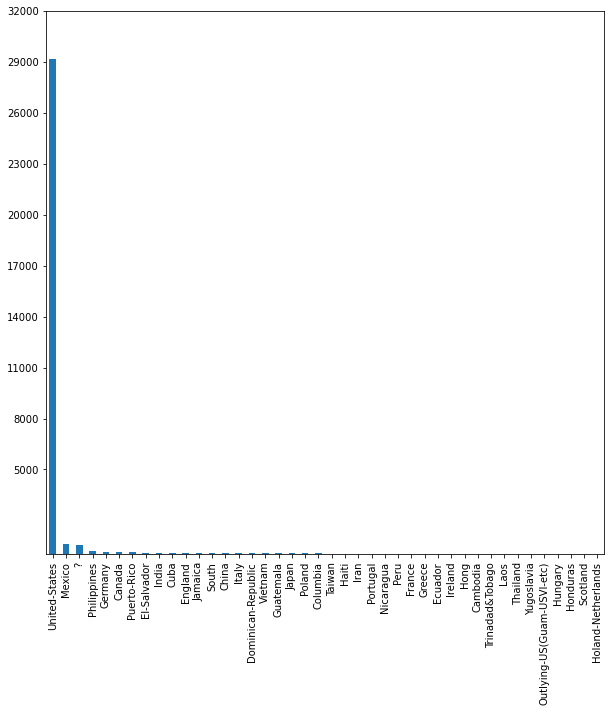

In [19]:
#checking native-country

df['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

In [20]:
#Since we found '?' in columns occupation, workclass, and native-country
#we remove the records that contains the question mark '?'

df.loc[(df['occupation'] == '?') | (df['workclass'] == '?') | (df['native-country'] == '?')]

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
14,40,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,?,>50K
27,54,60,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,South,>50K
38,31,38,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,?,>50K
51,18,30,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,?,<=50K
61,32,40,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,55,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,United-States,>50K
32531,30,99,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,United-States,<=50K
32539,71,10,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,United-States,>50K
32541,41,32,?,HS-grad,Separated,?,Not-in-family,Black,Female,United-States,<=50K


In [21]:
#removed the records that contains the question mark '?' based on workclass

df.drop(df[df['workclass'] == '?'].index, inplace = True)
df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [22]:
#removed the records that contains the question mark '?' based on occupation

df.drop(df[df['occupation'] == '?'].index, inplace = True)
df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [23]:
#removed the records that contains the question mark '?' based on native-country

df.drop(df[df['native-country'] == '?'].index, inplace = True)
df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


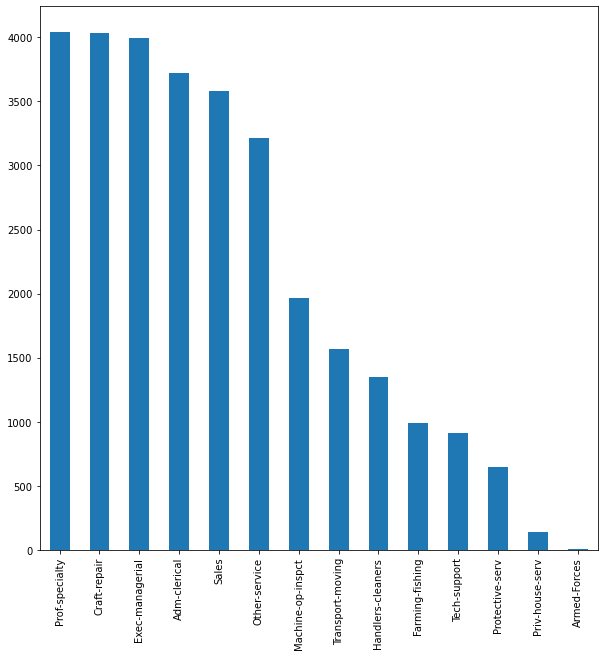

In [24]:
#checking whether the records that contains
#the question mark '?' have being removed

#checking occupation

df['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

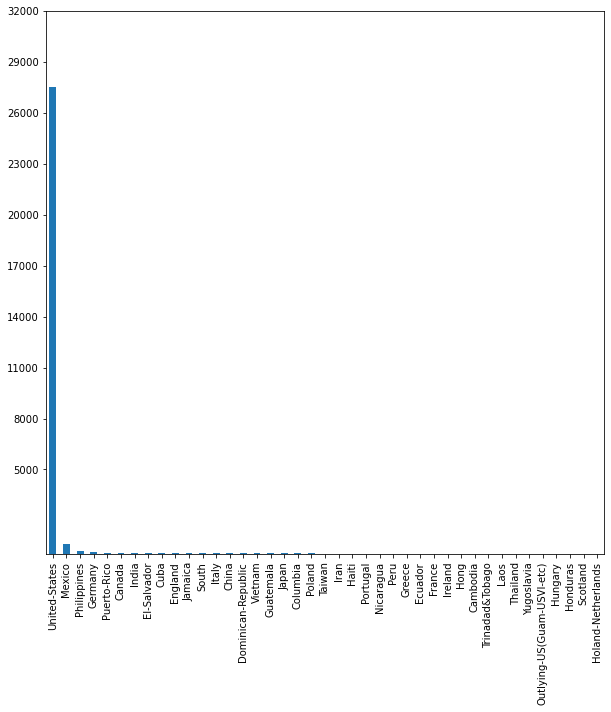

In [25]:
#checking native-country

df['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

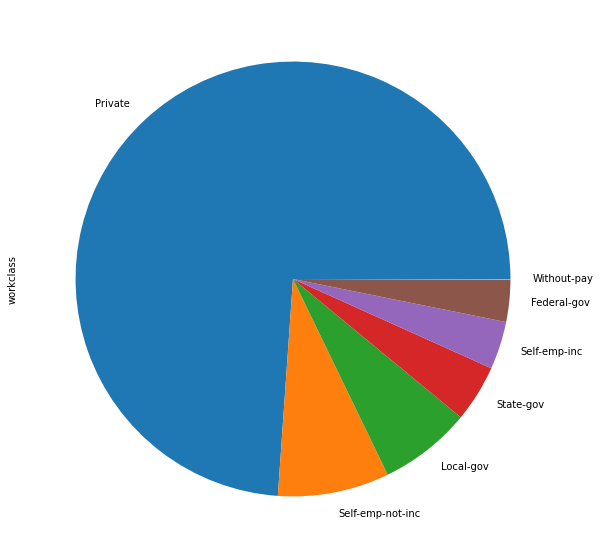

In [26]:
#checking workclass

df['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [27]:
df.reset_index(inplace = True,drop=True)
df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30158,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30159,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30160,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [28]:
df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30158,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30159,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30160,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [47]:
#Visualising libraries

import plotly.express as px
import seaborn as sns

In [48]:
fig = px.scatter(df, x="age", y="hours-per-week")
fig.show()

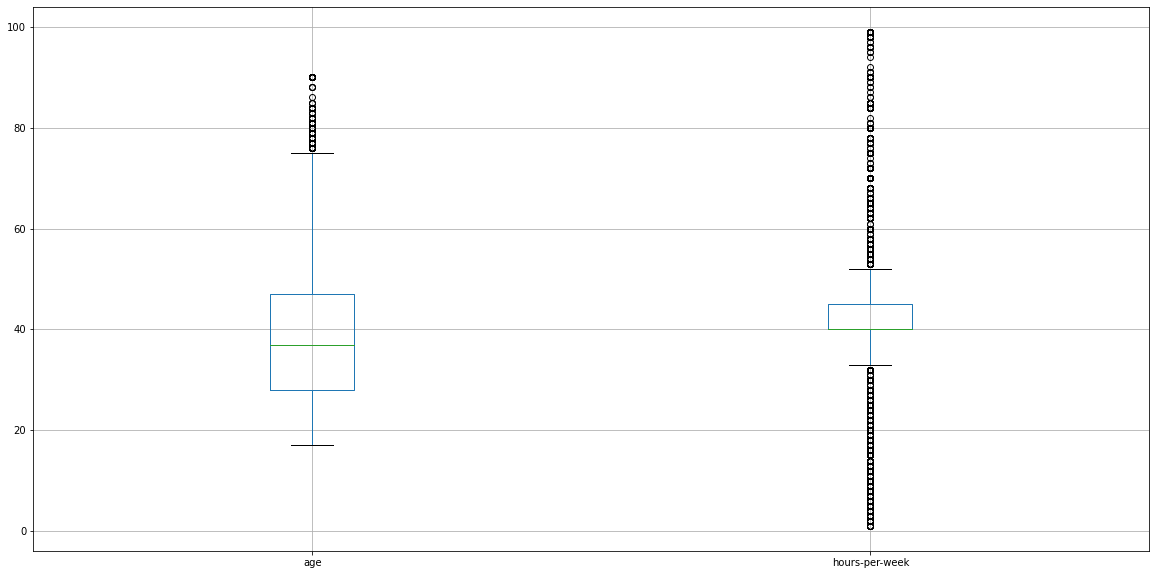

In [49]:
df.boxplot(column=['age', 'hours-per-week'])
plt.show()

<AxesSubplot:xlabel='education', ylabel='age'>

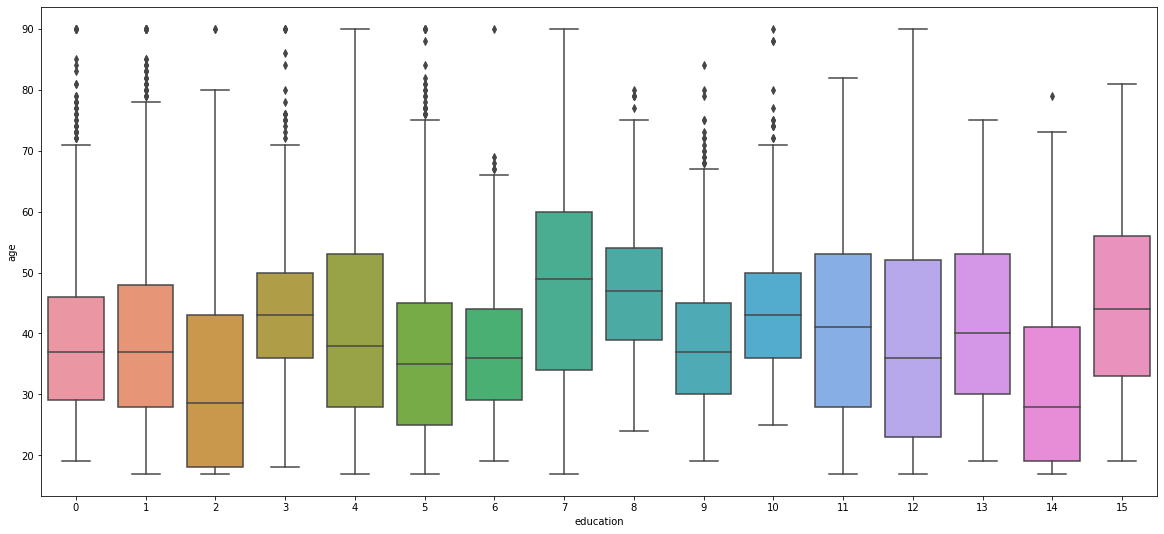

In [50]:
a4_dims = (20, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='education', y='age', data=df)

<AxesSubplot:xlabel='education', ylabel='hours-per-week'>

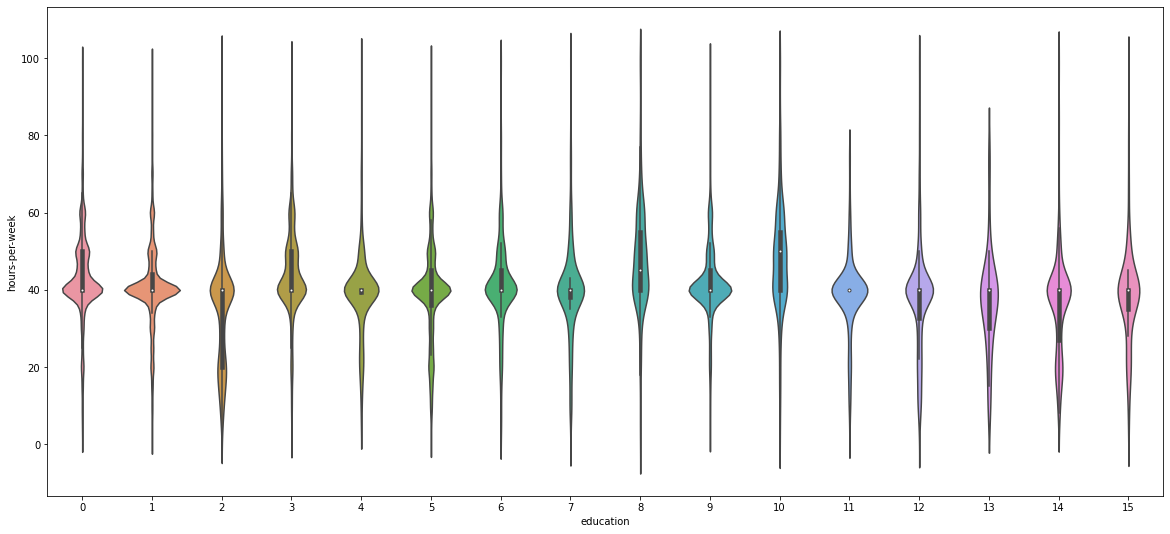

In [51]:
a4_dims = (20, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data = df,ax=ax, x='education', y='hours-per-week')

In [52]:
#Moved the salary column to another variable
target_salary = df.pop('salary')
df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,0,0,0,0,0,0,0,0
1,50,13,1,0,1,1,1,0,0,0
2,38,40,2,1,2,2,0,0,0,0
3,53,40,2,2,1,2,1,1,0,0
4,28,40,2,0,1,3,2,1,1,1


In [53]:
#converting the categorical variables to numeric variables

label = {}
for c in df.iloc[:,2:].columns:
   df[c], label[c] = pd.factorize(df[c])

df.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,0,0,0,0,0,0,0,0
1,50,13,1,0,1,1,1,0,0,0
2,38,40,2,1,2,2,0,0,0,0
3,53,40,2,2,1,2,1,1,0,0
4,28,40,2,0,1,3,2,1,1,1


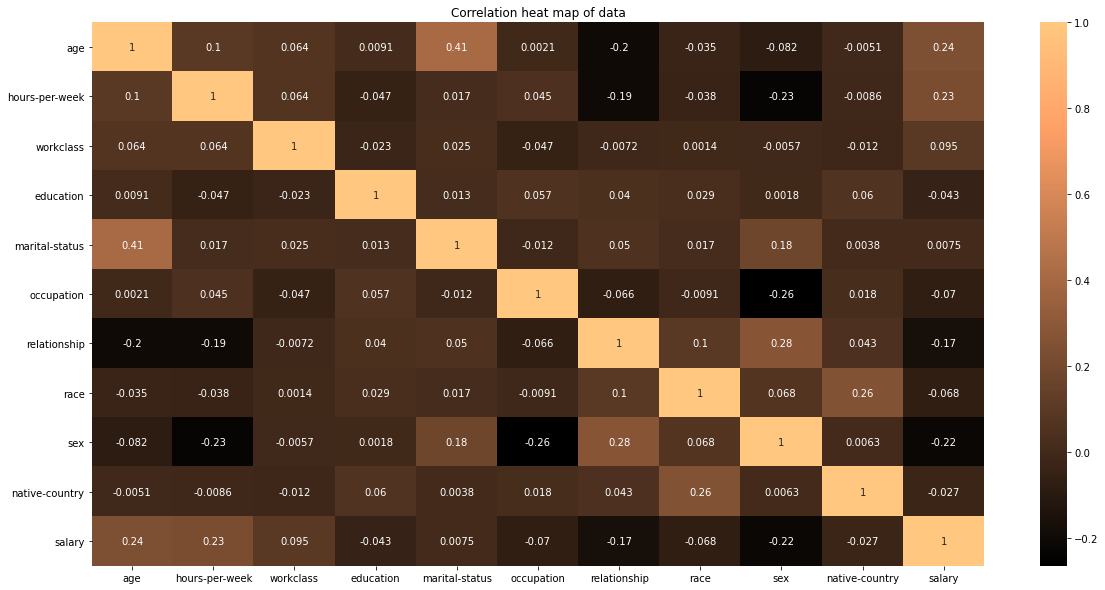

In [46]:
sns.heatmap(df.corr(),annot = True,cmap='copper')
plt.title('Correlation heat map of data')
plt.rcParams['figure.figsize']=(20,10)
plt.show()